In [1]:
import numpy as np
import matplotlib
#allow for latex markup in matplotlib figures
matplotlib.rcParams['text.usetex'] = False
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


#Import a few utility functions...
import sys  
from pathlib import Path
sys.path.insert(0, "../comm_channel")
sys.path.insert(0, "../polling_systems")
sys.path.insert(0, "../geometry")
sys.path.insert(0, "../utils")

#So we can import my local libs
import CommChannel as CC
import qos
import pointcloud as PC
import TSPN
import PollingSystem as PS
import MarkovianRP as MRP
import dtr
import motion

import sim_template as sim
from importlib import reload 

In [2]:
#setup quality of service requirements using reasonable values
F5GHz, F2_4GHz = 5, 2.4 #typical wifi frequencies are 2.4, 5, and sometiems 6 GHz
MOBILE_TX_POWER = qos.Pwr(20)#100-200mW (20-23 dBm) pretty typical, with 1W (30dBm) the absolute maximum
print(MOBILE_TX_POWER)
r = 8#any of 2, 4, 6, or 8
rx_noise = qos.Pwr(-85)#based on Yan and MostofiTWC13 #1e-10#
print(rx_noise)
BER = 1e-6
GAMMA_TH = qos.QoSReq(BER, r, rx_noise).thresholdChannelGain(MOBILE_TX_POWER)
print(GAMMA_TH)
print('SNR Threshold: %d'%(GAMMA_TH+MOBILE_TX_POWER.dBm - rx_noise.dBm))

20.000000 dBm	-10.000000 dBW	100.000000 mW	0.100000 W
-85.000000 dBm	-115.000000 dBW	0.000000 mW	0.000000 W
-71.8297512825111
SNR Threshold: 33


In [3]:
#Setup the communication environment:

#For now, use same channel params
nPL = 5.3
kPL = -20

decorrSH = 2.09  
alpha = 16
sigmaSH = np.sqrt(alpha)
psdAtFC = 30

lam = 0.125
kRic = 10
decorrMP = 0.4*lam         
corrMP = 1
#sigmaMP = 3
sigmaMP = 1.5


#12 remote stations
l = 11
qBase = np.array([[2,6],[21,3],
                 [16,11],[28,23],
                 [10,22],[11,39],
                 [30, 11],[48, 8],
                 [18, 36],[35, 41]])#,
                 #[32, 33],[48, 25]])

sub_regions = [[25,0,10,0],
               [30,10, 25, 9],
               [20,0, 40, 17],
               [50, 25, 15, 3],
               [38, 15, 45, 27]]#,
               #[50, 30, 40, 20]]


x_max = 50
x_min = 0
y_max = 50
y_min = 0
region = [x_max, x_min, y_max, y_min]


cps = [CC.ChannelParams(qBase[i], nPL, kPL, sigmaSH, decorrSH, decorrMP, lam,
                      kRic, corrMP, psdAtFC, sigmaMP) for i in range(len(qBase))]



#res = 2/decorrMP
res = 10
n = 5
p_th = 0.5

#Polling System Setup
bandwidth = 2#leave bandwidth in MHz*1000000#give ourselfes 2MHz of BW
beta = 1/(r*bandwidth)
print(beta)
els = [0.1/beta, 0.2/beta, 0.01/beta, 0.05/beta, 0.02/beta]#, 0.1/beta]
print(els)

0.0625
[1.6, 3.2, 0.16, 0.8, 0.32]


In [4]:
reload(sim)
ccs, cfs, true_joint_con_fields, tjcps = sim.create_channels(cps, region, res, GAMMA_TH, sub_regions)

Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.


In [5]:
reload(sim)
pcs, pfs, pjcps, prob_pred_con = sim.predict_channels(res, ccs, true_joint_con_fields, GAMMA_TH, p_th=p_th)
trismall_pcs = pcs
#%store trismall_pcs
print(prob_pred_con)

Drawing 250 samples from Channel 1
Completed PredictedChannel 1
Drawing 250 samples from Channel 2
Completed PredictedChannel 2
Drawing 320 samples from Channel 3
Completed PredictedChannel 3
Drawing 320 samples from Channel 4
Completed PredictedChannel 4
Drawing 460 samples from Channel 5
Completed PredictedChannel 5
Drawing 460 samples from Channel 6
Completed PredictedChannel 6
Drawing 300 samples from Channel 7
Completed PredictedChannel 7
Drawing 300 samples from Channel 8
Completed PredictedChannel 8
Drawing 414 samples from Channel 9
Completed PredictedChannel 9
Drawing 414 samples from Channel 10
Completed PredictedChannel 10
[0.6611295681063123, 0.7604731394775751, 0.7370517928286853, 0.8461538461538461, 0.7569444444444444]


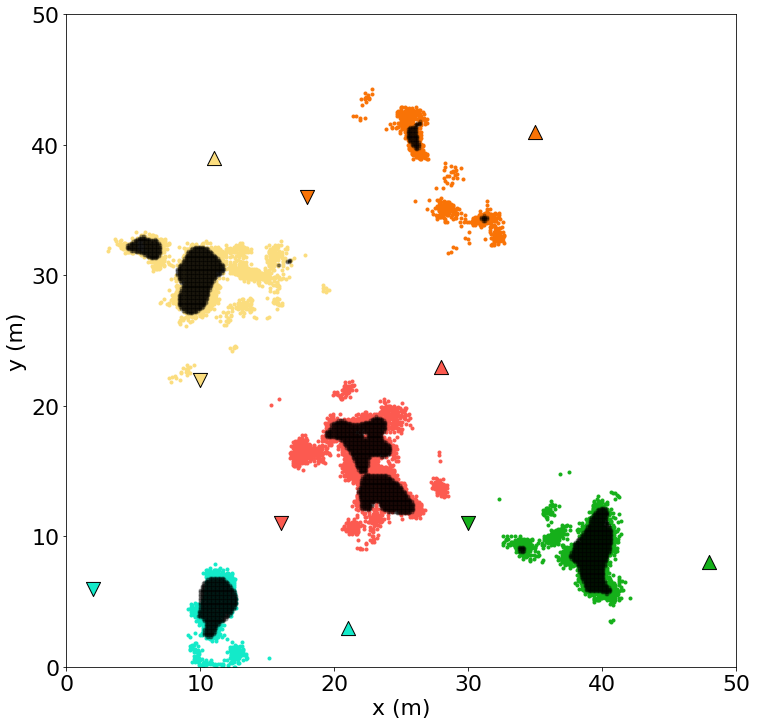

In [6]:
reload(sim)
sim.plotCFwithOverlay(n, tjcps, pjcps, qBase, region)
plt.gca().invert_yaxis()
plt.show()

In [7]:
reload(sim)
reload(dtr)
dt_sys, AORP = sim.setup_polling_sys(pcs, els, beta, GAMMA_TH, p_th=p_th)

Extracted edges...
Polygons constructed, looking for holes...
Constructed 1 possibly non-convex polygons
5 total subregions
Extracted edges...
Polygons constructed, looking for holes...
Constructed 1 possibly non-convex polygons
16 total subregions
Extracted edges...
Polygons constructed, looking for holes...
Constructed 3 possibly non-convex polygons
9 total subregions
Extracted edges...
Polygons constructed, looking for holes...
Constructed 2 possibly non-convex polygons
9 total subregions
Extracted edges...
Polygons constructed, looking for holes...
Constructed 2 possibly non-convex polygons
4 total subregions
Academic license - for non-commercial use only - expires 2022-07-30
Using license file /opt/gurobi912/gurobi.lic
[[ 0.33333333 -1.          1.          0.          0.          0.
   0.          0.        ]
 [ 2.5         1.          0.          1.          0.          0.
   0.          0.        ]
 [ 1.125       1.          0.          0.          1.          0.
   0.         

[[ 1.          0.          1.          0.          0.          0.
   0.        ]
 [-0.35294118  1.          0.          1.          0.          0.
   0.        ]
 [-2.         -1.          0.          0.          1.          0.
   0.        ]
 [-0.45454545 -1.          0.          0.          0.          1.
   0.        ]
 [ 3.33333333 -1.          0.          0.          0.          0.
   1.        ]]
[[ 15.1       ]
 [ -0.82941176]
 [-30.7       ]
 [ -9.52727273]
 [ 46.53333333]]
[[ 2.          1.          1.          0.          0.          0.
   0.          0.        ]
 [ 1.33333333  1.          0.          1.          0.          0.
   0.          0.        ]
 [-1.2         1.          0.          0.          1.          0.
   0.          0.        ]
 [-2.          1.          0.          0.          0.          1.
   0.          0.        ]
 [-0.27272727 -1.          0.          0.          0.          0.
   1.          0.        ]
 [ 1.          0.          0.          0.       

[[ 0.33333333 -1.          1.          0.          0.          0.
   0.          0.        ]
 [ 2.5         1.          0.          1.          0.          0.
   0.          0.        ]
 [ 1.125       1.          0.          0.          1.          0.
   0.          0.        ]
 [-0.08333333  1.          0.          0.          0.          1.
   0.          0.        ]
 [-1.6         1.          0.          0.          0.          0.
   1.          0.        ]
 [-1.          0.          0.          0.          0.          0.
   0.          1.        ]]
[[ -1.16666667]
 [ 37.15      ]
 [ 19.9625    ]
 [  5.825     ]
 [-10.1       ]
 [-10.        ]]
[[ 0.         -1.          1.          0.          0.          0.        ]
 [ 1.125       1.          0.          1.          0.          0.        ]
 [-0.08333333  1.          0.          0.          1.          0.        ]
 [-1.6         1.          0.          0.          0.          1.        ]]
[[ -5.9   ]
 [ 19.9625]
 [  5.825 ]
 [-10.1

C0 0.0
C1 5.498640312088783
C2 0.0
C3 3.788939365935121
C4 5.496625842048558
C5 0.0
C6 3.782660618214209
C7 5.502417688337518
C8 6.936413083764071
C9 3.7824705202712625
C10 12.638657354825543
C11 12.643055315326869
C12 9.701887610984063
C13 12.64589282910965
C14 16.001547430996833
C15 5.552867734114994
C16 5.558034572561069
C17 10.201573009153385
C18 5.552976097032183
C19 7.29845182309828
C20 0.1733152825064792
C21 0.0004888788211481199
C22 0.19114274170627077
C23 1.3253537121204682
C24 4.568984033605874
C25 2.6386573548255434
z tilde 0.1.0 1.0
z tilde 0.1.1 1.0
z tilde 0.1.2 1.0
z tilde 0.1.3 1.0
z tilde 0.1.4 1.0
z tilde 0.1.5 1.0
theta 0.1 6.0
theta tilde 0.1 1.0
C34 -0.3471322658850067
C35 0.19114274170627077
C36 1.3253537121204682
C37 4.568984033605874
z tilde 0.2.0 -346.4793981508917
z tilde 0.2.1 1.0
z tilde 0.2.2 1.0
z tilde 0.2.3 1.0
theta 0.2 -343.4793981508917
theta tilde 0.2 0.0
C44 -2.9613483499447844
C45 6.730182443766058
C46 2.5016074402067203
z tilde 0.3.0 -2963.3096982

[[ 0.33333333 -1.          1.          0.          0.          0.
   0.          0.        ]
 [ 2.5         1.          0.          1.          0.          0.
   0.          0.        ]
 [ 1.125       1.          0.          0.          1.          0.
   0.          0.        ]
 [-0.08333333  1.          0.          0.          0.          1.
   0.          0.        ]
 [-1.6         1.          0.          0.          0.          0.
   1.          0.        ]
 [-1.          0.          0.          0.          0.          0.
   0.          1.        ]]
[[ -1.16666667]
 [ 37.15      ]
 [ 19.9625    ]
 [  5.825     ]
 [-10.1       ]
 [-10.        ]]
[[ 0.         -1.          1.          0.          0.          0.        ]
 [ 1.125       1.          0.          1.          0.          0.        ]
 [-0.08333333  1.          0.          0.          1.          0.        ]
 [-1.6         1.          0.          0.          0.          1.        ]]
[[ -5.9   ]
 [ 19.9625]
 [  5.825 ]
 [-10.1

C0 0.0
C1 5.498966050201376
C2 0.0
C3 3.788107174357356
C4 5.49815515107476
C5 0.0
C6 3.7832126722613535
C7 5.503514268620086
C8 6.937828519308069
C9 3.781264134019285
C10 12.63835654836164
C11 12.642129716510553
C12 9.698155099913842
C13 12.646261781716829
C14 16.00024653465362
C15 5.554108629095898
C16 5.557458245419801
C17 10.201023173948483
C18 5.553729445382826
C19 7.299803162558038
C20 0.17465644630868482
C21 1.7763568394002505e-15
C22 0.1902402539972563
C23 1.324087749934238
C24 4.567261848282726
C25 2.6383565483616405
z tilde 0.1.0 1.0
z tilde 0.1.1 1.0
z tilde 0.1.2 1.0
z tilde 0.1.3 1.0
z tilde 0.1.4 1.0
z tilde 0.1.5 1.0
theta 0.1 6.0
theta tilde 0.1 1.0
C34 -0.34589137090410205
C35 0.1902402539972563
C36 1.324087749934238
C37 4.567261848282726
z tilde 0.2.0 -345.23726227500606
z tilde 0.2.1 1.0
z tilde 0.2.2 1.0
z tilde 0.2.3 1.0
theta 0.2 -342.23726227500606
theta tilde 0.2 0.0
C44 -2.9624525147148244
C45 6.7308217258191565
C46 2.5028149122471914
z tilde 0.3.0 -2964.414967

{'WT': 4.230897792524337, 'X': array([[12.63835655,  5.55410863],
       [12.64212972,  5.55745825],
       [ 9.6981551 , 10.20102317],
       [12.64626178,  5.55372945],
       [16.00024653,  7.29980316]]), 'pi': array([0.25921843, 0.54569626, 0.001     , 0.19212981, 0.00195549])}


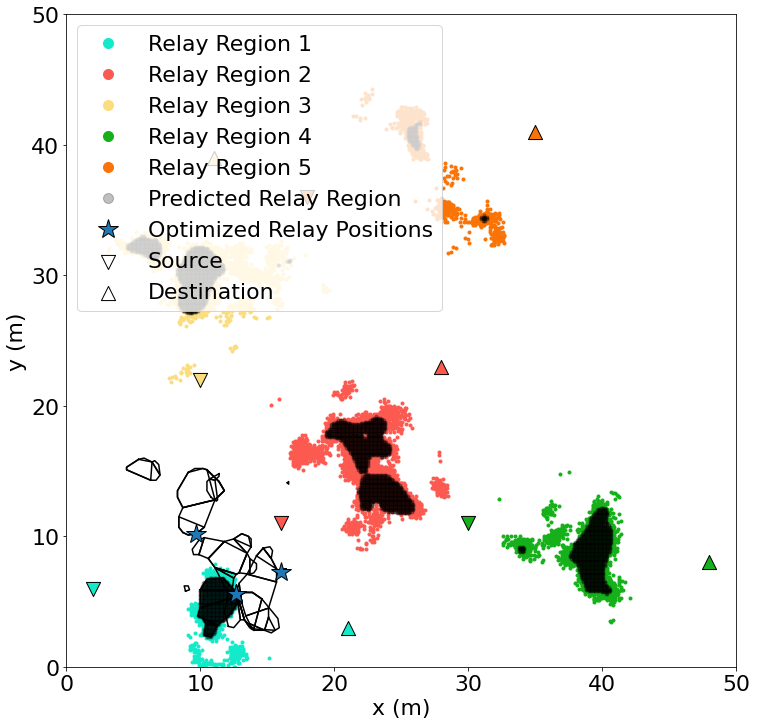

In [8]:
print(AORP)
reload(sim)
sim.plot_AORP(dt_sys, AORP, tjcps, pjcps, qBase, region)

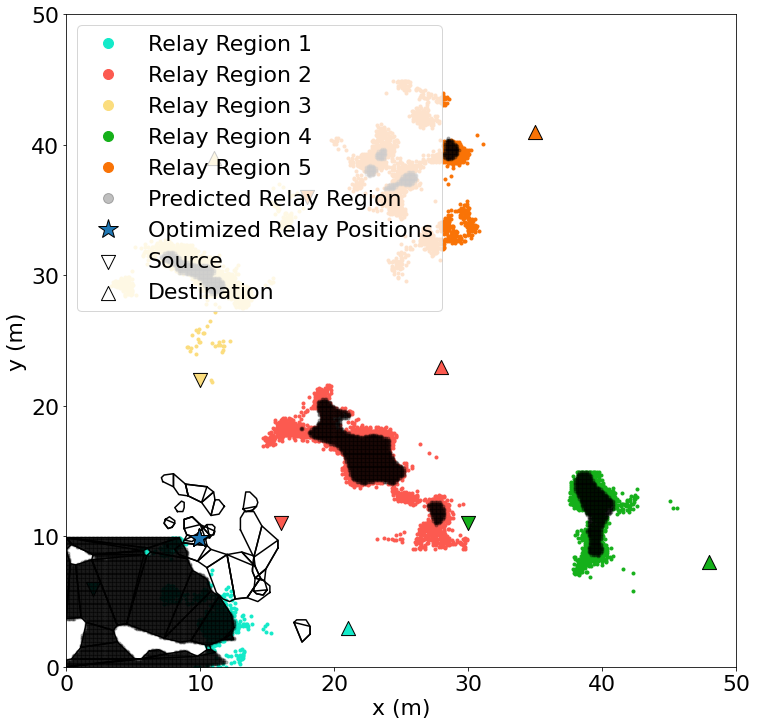

In [8]:
reload(sim)
sim.plot_AORP(dt_sys, AORP, tjcps, pjcps, qBase, region)

In [ ]:
reload(sim)
motion_power = motion.LinearMotionPower(7.2, 0.29)
hrs = 1; mins = 0; seconds = 0;
ps = dt_sys.ps
AORP_res, AORP_xt, cyrp_res, cyrp_xt, rtable_res, rtable_xt = sim.run_sims(ps, AORP, hrs, mins, seconds, motion_power, MOBILE_TX_POWER.W)

In [9]:
AORP

{'WT': 0.030551467388368735,
 'X': array([[9.91661877, 9.90199239],
        [9.91688002, 9.90352571],
        [9.91991597, 9.90547564],
        [9.91563441, 9.90402617],
        [9.91984279, 9.9       ]]),
 'pi': array([0.25208041, 0.40522029, 0.06361751, 0.19306963, 0.08601216])}